<a href="https://colab.research.google.com/github/Kritika1303/Zeotap_assignment/blob/main/Kritika_Kritika_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Importing Libraries***

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***EDA for Customers.csv***

In [13]:
customers=pd.read_csv('/content/drive/MyDrive/Zeotap_Assignment/Customers.csv')
customers #show dataframe

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [14]:
customers.describe() #descriptive stats of numerical variables

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [15]:
customers.info()   #for checking data type and null values if occuring

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


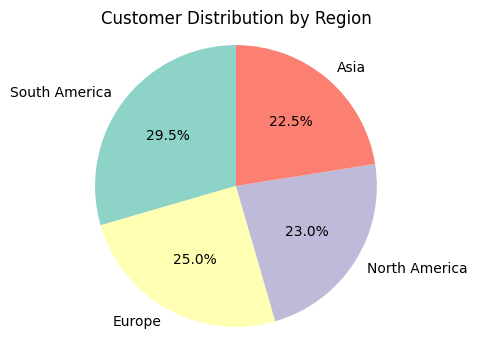

In [73]:
# Customer Distribution by Region using Pie Chart
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(region_counts)))
plt.title('Customer Distribution by Region')
plt.axis('equal')
plt.show()

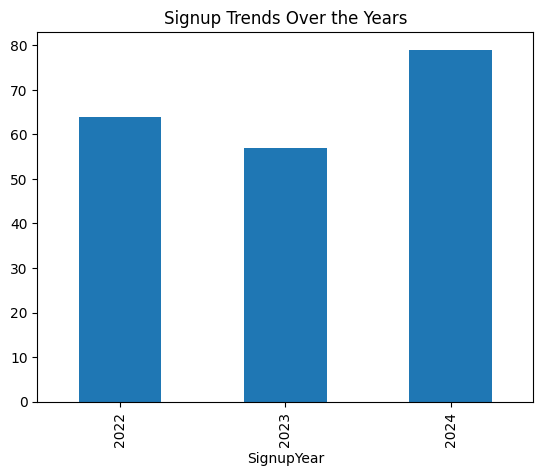

In [23]:
# Sign-up trends across different years using bar chart
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupYear'].value_counts().sort_index().plot(kind='bar')
plt.title('Signup Trends Over the Years')
plt.show()

***EDA for Products.csv***

In [24]:
products=pd.read_csv('/content/drive/MyDrive/Zeotap_Assignment/Products.csv')
products #show dataframe

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [26]:
products.describe() #descriptive stats of numerical variables

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [27]:
products.info() #for checking data type and null values if occuring

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


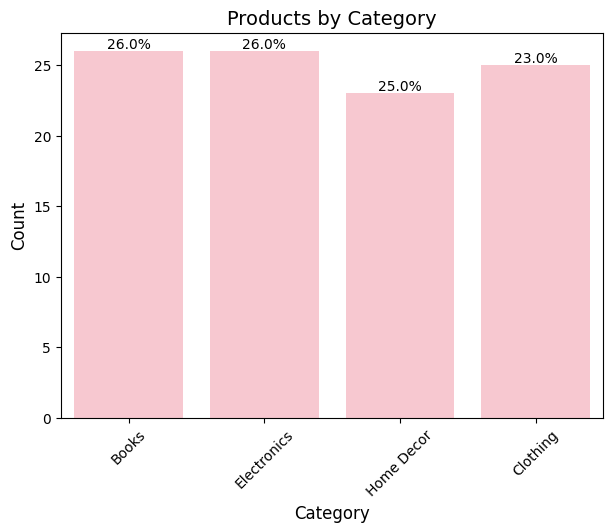

In [74]:
# Percentage of Products as per Category using bar chart
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=products, x='Category', color='pink')
category_counts = products['Category'].value_counts()
total_products = len(products)
percentages = (category_counts / total_products) * 100
for bar, percentage in zip(ax.patches, percentages):   #Annotate bars with percentages
    ax.text(
        bar.get_x() + bar.get_width() / 2,     # Align percentage to center of the bar width
        bar.get_height() ,                     # Align percentage to just above the bar height
        f'{percentage:.1f}%',                  # Percentage text
        ha='center', va='bottom', fontsize=10  # Alignment and font size
    )

plt.title('Products by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

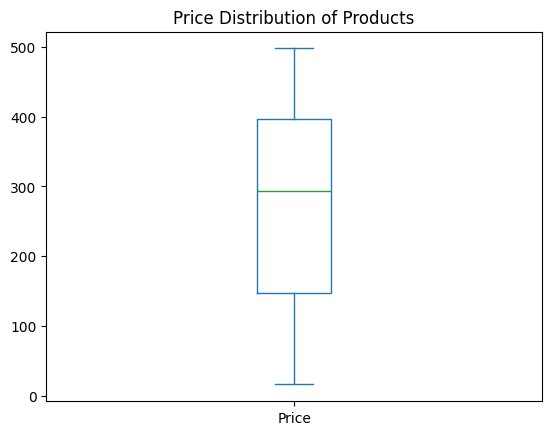

In [35]:
# Price distribution of products using box plot(showing max, min, 1st, 2nd, 3rd quartile prices)
products['Price'].plot(kind='box')
plt.title('Price Distribution of Products')
plt.show()

In [36]:
# Details of top 5 most expensive products
print(products.nlargest(5, 'Price'))

   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86


***EDA for Transactions.csv***

In [41]:
transactions=pd.read_csv('/content/drive/MyDrive/Zeotap_Assignment/Transactions.csv')
transactions #show dataframe

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [43]:
transactions.describe()  #descriptive stats of numerical variables

,TransactionDate,Quantity,TotalValue,Price,Year
count,1000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023.996000
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2023.000000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2024.000000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2024.000000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024.000000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024.000000
std,NaN,1.117981,493.144478,140.73639,0.063151


In [44]:
transactions.info() #for checking data type and null values if occuring

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   Year             1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 58.7+ KB


In [50]:
# Overall Sales Distribution
print(f"Total Sales Value: ${transactions['TotalValue'].sum():,.2f}")
print(f"Average Transaction Value: ${transactions['TotalValue'].mean():,.2f}")
print(f"Median Transaction Value: ${transactions['TotalValue'].median():,.2f}")

Total Sales Value: $689,995.56
Average Transaction Value: $690.00
Median Transaction Value: $588.88


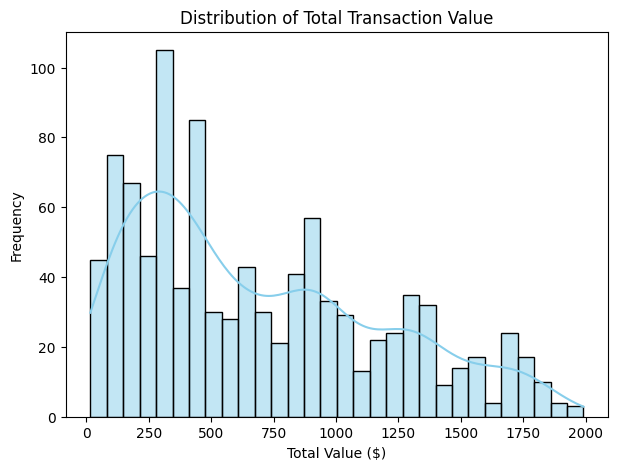

In [82]:
# Distribution of total trasaction value(frequency vs total value)
plt.figure(figsize=(7, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value ($)')
plt.ylabel('Frequency')
plt.show()

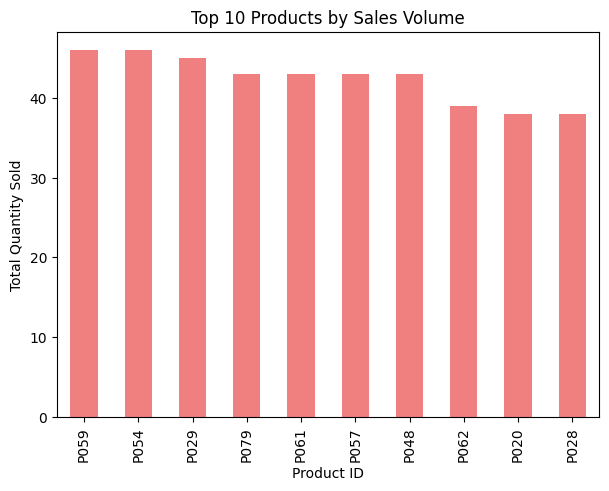

In [83]:
# Top 10 products by sales volume using bar chart
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(7, 5), color='lightcoral')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()

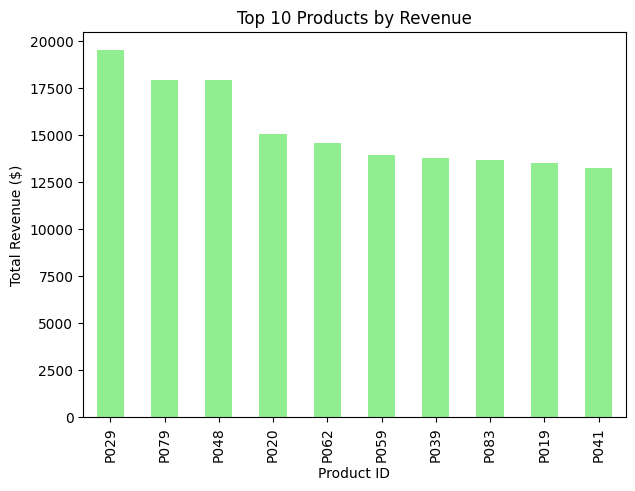

In [84]:
# Top 10 products by revenue
top_revenue_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_revenue_products.plot(kind='bar', figsize=(7, 5), color='lightgreen')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.show()

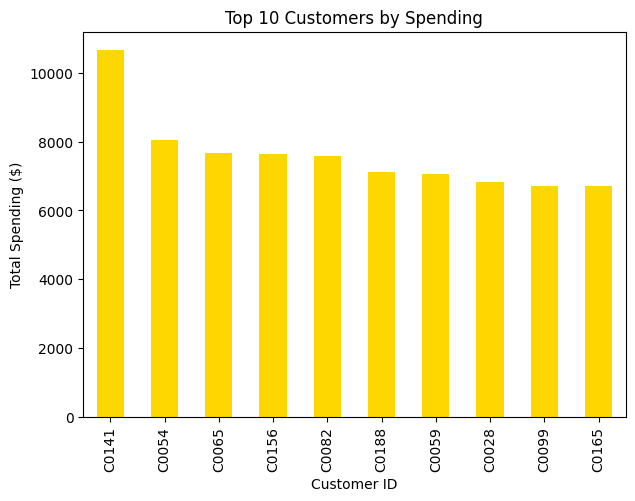

In [85]:
# Top 10 customers by spending using bar chart
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(7, 5), color='gold')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending ($)')
plt.show()

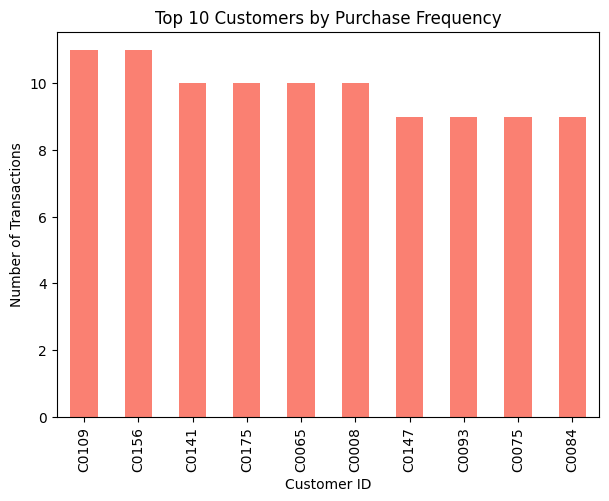

In [86]:
# Top 10 customers by purchase frequency using bar chart
customer_frequency = transactions['CustomerID'].value_counts().head(10)
customer_frequency.plot(kind='bar', figsize=(7, 5), color='salmon')
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.show()

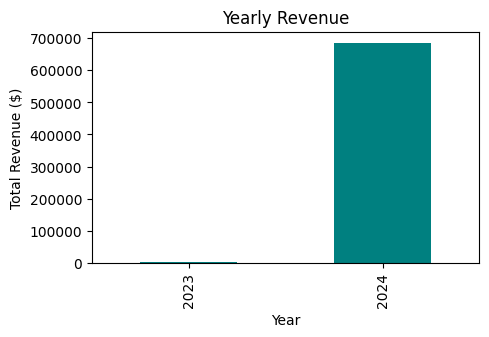

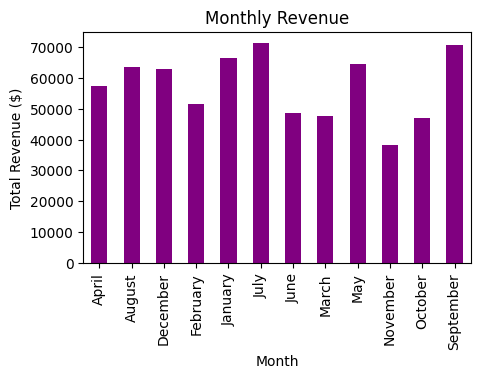

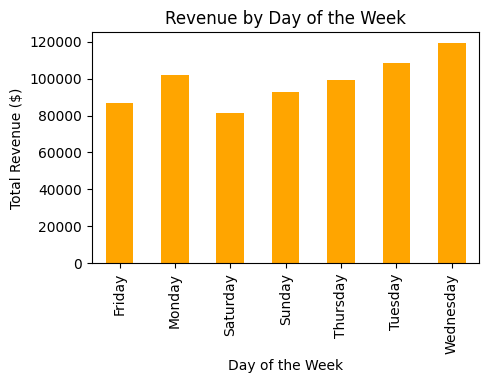

In [88]:
# Revenue by time period
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month_name()
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()

# Revenue by year
revenue_by_year = transactions.groupby('Year')['TotalValue'].sum()
revenue_by_year.plot(kind='bar', figsize=(5, 3), color='teal')
plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.show()

# Revenue by month
revenue_by_month = transactions.groupby('Month')['TotalValue'].sum()
revenue_by_month.plot(kind='bar', figsize=(5, 3), color='purple')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.show()

# Revenue by day of the week
revenue_by_day = transactions.groupby('DayOfWeek')['TotalValue'].sum()
revenue_by_day.plot(kind='bar', figsize=(5, 3), color='orange')
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.show()

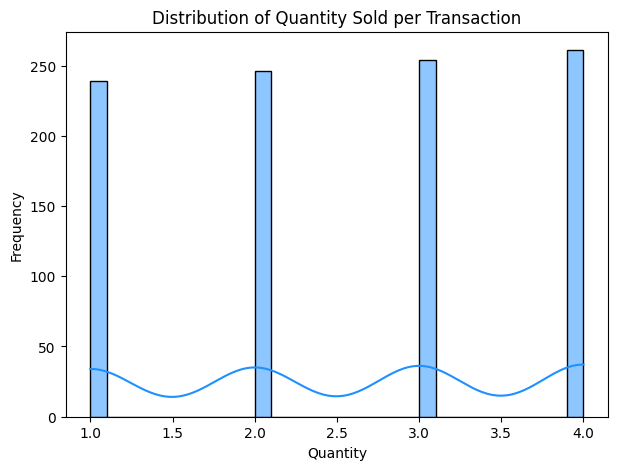

In [89]:
# Distribution of quantity sold per transaction using histplot
plt.figure(figsize=(7, 5))
sns.histplot(transactions['Quantity'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Quantity Sold per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

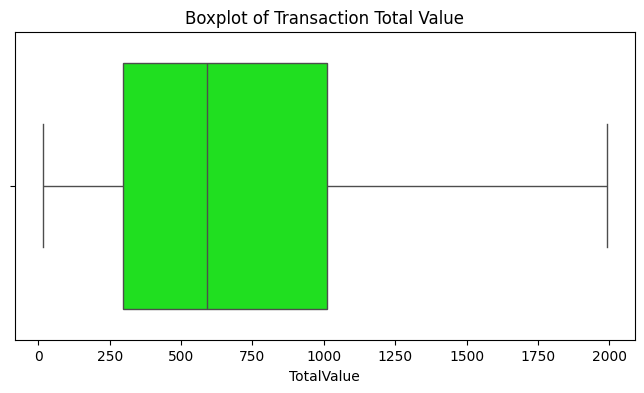

In [92]:
# Outlier Detection and boxplot of transaction total value
plt.figure(figsize=(8, 4))
sns.boxplot(data=transactions, x='TotalValue', color='lime')
plt.title('Boxplot of Transaction Total Value')
plt.show()

***EDA on merged datasets***

In [61]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_data #show dataframe

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Year,Month,DayOfWeek,CustomerName,Region,SignupDate,SignupYear,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,August,Sunday,Andrea Jenkins,Europe,2022-12-03,2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,May,Monday,Brittany Harvey,Asia,2024-09-04,2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,April,Thursday,Kathryn Stevens,Europe,2024-04-04,2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,March,Tuesday,Travis Campbell,South America,2024-04-11,2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,March,Thursday,Timothy Perez,Europe,2022-03-15,2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024,October,Thursday,Jacob Holt,South America,2022-01-22,2022,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024,June,Tuesday,Mrs. Kimberly Wright,North America,2024-04-07,2024,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024,April,Friday,Tyler Haynes,North America,2024-09-21,2024,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024,September,Sunday,Joshua Hamilton,Asia,2024-11-11,2024,SoundWave Smartwatch,Electronics,459.86


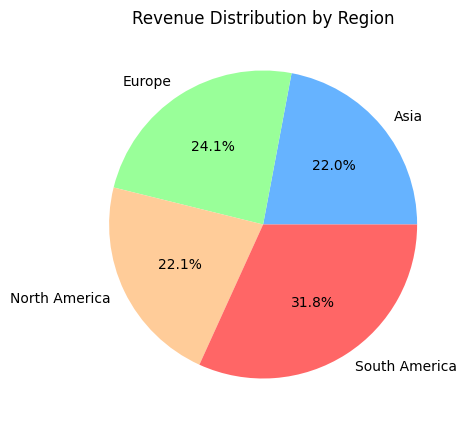

In [94]:
# Revenue Distribution by Region using pie chart
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(5, 5))
revenue_by_region.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#ffb3e6'])
plt.title('Revenue Distribution by Region')
plt.ylabel('')
plt.show()

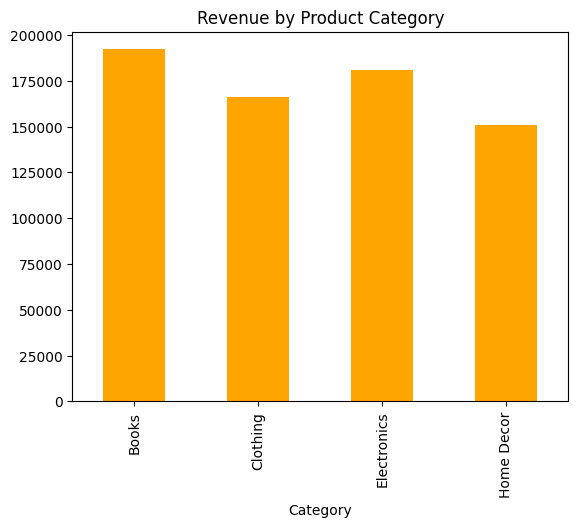

In [66]:
# Revenue by Product categories using bar chart
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Product Category')
plt.show()

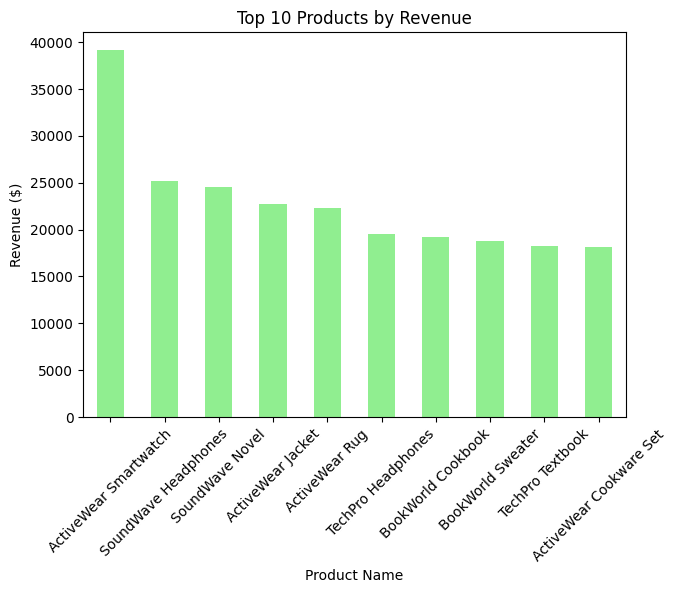

In [95]:
# Top 10 products by revenue using bar chart
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
product_revenue.plot(kind='bar', figsize=(7, 5), color='lightgreen')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

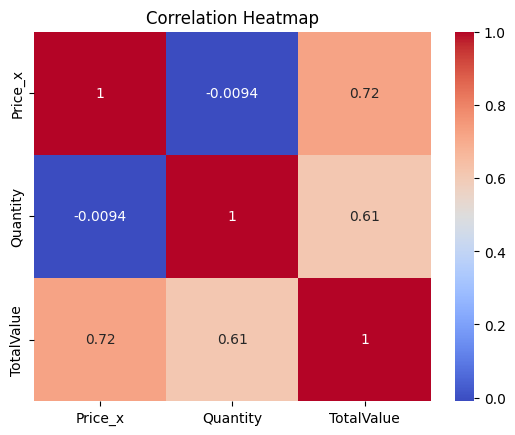

In [68]:
# Correlation matrix for Price, Quantity and TotalValue
correlation_matrix = merged_data[['Price_x', 'Quantity', 'TotalValue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()